In [2]:
# python 2 support
from __future__ import print_function, division

# Numpy -  multidimensional data arrays

J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).


* Modified for CS/M/P356 by Todd Iverson (tiverson@smumn.edu)

In [3]:
# what is this line all about?!? Answer in lecture 4
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Introduction

### The `numpy` package (module)

* (almost) all computations using Python.

* provides high-performance 

  - vector, 

  - matrix and 

  - higher-dimensional data. 

* Implemented in C and Fortran 

 -performance is very good for vectors and matrices. 

To use `numpy` need to import the module it using of example:

In [4]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



### Why use `numpy.ndarray`

* Numpy arrays are **statically typed** and **homogeneous**. 
   - The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Fast mathematical functions implemented in a compiled language (C and Fortran is used).

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

In [5]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

print(v)

[1 2 3 4]


In [6]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

print(M)

[[1 2]
 [3 4]]


# Getting `ndarray` information 

In [7]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

## Shape, Size, and Number of Dimensions

In [8]:
v.shape

(4,)

In [9]:
M.shape

(2, 2)

In [10]:
M.size

4

In [11]:
M.ndim

2

In [12]:
v.ndim

1

## `numpy` arrays have a fixed type

In [13]:
M.dtype

dtype('int64')

### The type can't be changed

In [14]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

## Explicitly Define the Type: `dtype` 

In [ ]:
C = np.array([[1, 2], [3, 4]], dtype=complex)

print(C)

## Common types:

- `int`, 

- `float`, 

- `complex`, 

- `bool`, 

- `object`, etc.

## Explicit bit size: 

- `int64`, 

- `int16`, 

- `float128`, 

- `complex128`.

# Using array-generating functions

For larger arrays 

* Inpractical to initialize manually

* use built-in functions in `numpy`

Some of the more common are:

## `arange` - Sequences using stepsize

In [ ]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

In [ ]:
x = np.arange(-1, 1, 0.1)

x

## `linspace` and `logspace` - Sequences using the number of points

In [ ]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

In [ ]:
np.logspace(0, 10, 10, base=np.e)

## `mgrid ` - A grid of 2D coordinates

In [ ]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [ ]:
x

In [ ]:
y

## zeros and ones

In [ ]:
np.zeros((3,3))

In [ ]:
np.ones((3,3))

## Manipulating arrays

### Indexing

We can index elements in an array using the square bracket and indices:

In [ ]:
v = np.array([1,2,3,4])
print(v)

In [ ]:
M = np.array([[1,2],[3,4]])
print(M)

### 1D indexing

In [ ]:
# v is a vector, and has only one dimension, taking one index
v[0]

In [ ]:
# Regular python slicing works for v

v[1:3]

In [ ]:
#Recall that v[:] is shorthand for v[0:len(v)]
v[:]

### 2D Indexing

In [ ]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [ ]:
M

In [ ]:
M[1]

The same thing can be achieved with using `:` instead of an index: 


In [ ]:
M[1,:] # row 1

Here `M[1,:]` means *row 1, all columns*

In [ ]:
M[:,1] # column 1

Here `M[:,1]` means *all rows,column 1*.


*NOTE: Slicing returns a 1D array*

###Assignment using slicing

We can assign new values to elements in an array using indexing:

In [ ]:
M[0,0] = 1

In [ ]:
M

In [ ]:
# also works for rows and columns
M[1,:] = array([0,0])

In [ ]:
M

### Slicing with a stepsize
We can omit any of the three parameters in `M[lower:upper:step]`:

In [112]:
# lower, upper, stepsize
A[1:4:2]

array([-2,  4])

In [15]:
A[:] # lower, upper, step all take the default values

NameError: name 'A' is not defined

In [78]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [113]:
A[:3] # first three elements

array([ 1, -2, -3])

In [115]:
A[3:] # elements from index 3

array([4, 5])

### Negative Indexes
Negative indices counts from the end of the array (positive index from the begining):

In [116]:
A = array([1,2,3,4,5])

In [117]:
A[-1] # the last element in the array

5

In [118]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [52]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [53]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [54]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [122]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [123]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

## Index masks: 

 - index mask: array with type `bool`, 
 - an element is selected depending on index mask 

In [56]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [57]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [58]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

### Main feature: conditionally select elements 

In [59]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [60]:
5 < x

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [63]:
x[5 < x]

array([ 5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

### Multiplying booleans is the same as `and`

In [64]:
mask = (5 < x)*(x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [65]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

In [66]:
# Commonly combined into one step

x[(5<x)*(x<7.5)]

array([ 5.5,  6. ,  6.5,  7. ])

## Linear algebra

* Vectorizing code is the key to efficient calculation with Python/Numpy. 

* When possible used matrix and vector operations, 

    - like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [131]:
v1 = arange(0, 5)

In [132]:
v1 * 2

array([0, 2, 4, 6, 8])

In [133]:
v1 + 2

array([2, 3, 4, 5, 6])

In [134]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [136]:
A * A # element-wise multiplication NOT MATRIX MULTIPLY!

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [137]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [138]:
A.shape, v1.shape

((5, 5), (5,))

In [139]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [140]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [141]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [142]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [143]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [146]:
print M
print ""
print v

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]

[[0]
 [1]
 [2]
 [3]
 [4]]


In [147]:
M*M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [148]:
M*v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [149]:
# inner product
v.T * v

matrix([[30]])

In [150]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [151]:
v = matrix([1,2,3,4,5,6]).T

In [152]:
shape(M), shape(v)

((5, 5), (6, 1))

In [153]:
M * v

ValueError: objects are not aligned

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transforms matrix objects are:

In [154]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [155]:
conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [156]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [157]:
real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [158]:
imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Or the complex argument and absolute value

In [159]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [160]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Matrix computations

#### Inverse

In [161]:
inv(C) # equivalent to C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [162]:
C.I * C

matrix([[  1.00000000e+00+0.j,   0.00000000e+00+0.j],
        [  2.22044605e-16+0.j,   1.00000000e+00+0.j]])

#### Determinant

In [163]:
det(C)

(2.0000000000000004+0j)

In [164]:
det(C.I)

(0.49999999999999967+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties data from the Stockholm temperature dataset used above.

In [165]:
# reminder, the tempeature dataset is stored in the data variable:
shape(data)

(77431, 7)

#### mean

In [166]:
# the temperature data is in column 3
mean(data[:,3])

6.1971096847515925

The daily mean temperature in Stockholm over the last 200 year so has been about 6.2 C.

#### standard deviations and variance

In [167]:
std(data[:,3]), var(data[:,3])

(8.2822716213405663, 68.596023209663286)

#### min and max

In [168]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [169]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

#### sum, prod, and trace

In [170]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [171]:
# sum up all elements
sum(d)

45

In [172]:
# product of all elements
prod(d+1)

3628800

In [173]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [174]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [175]:
# same as: diag(A).sum()
trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [4]:
print data[:10,:]

[[  1.80000000e+03   1.00000000e+00   1.00000000e+00  -6.10000000e+00
   -6.10000000e+00  -6.10000000e+00   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   2.00000000e+00  -1.54000000e+01
   -1.54000000e+01  -1.54000000e+01   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   3.00000000e+00  -1.50000000e+01
   -1.50000000e+01  -1.50000000e+01   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   4.00000000e+00  -1.93000000e+01
   -1.93000000e+01  -1.93000000e+01   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   5.00000000e+00  -1.68000000e+01
   -1.68000000e+01  -1.68000000e+01   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   6.00000000e+00  -1.14000000e+01
   -1.14000000e+01  -1.14000000e+01   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   7.00000000e+00  -7.60000000e+00
   -7.60000000e+00  -7.60000000e+00   1.00000000e+00]
 [  1.80000000e+03   1.00000000e+00   8.00000000e+00  -7.10000000e+00
   -7.10000000e+00  -7.10000000e+00   1.00000000e+00]
 [  1.80

The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use the select out only the data for that month using:

In [5]:
unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [6]:
mask_feb = data[:,1] == 2

In [7]:
# the temperature data is in column 3
mean(data[mask_feb,3])

-3.2121095707366085

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

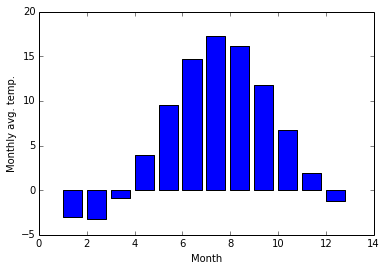

In [8]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc., is applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [9]:
m = rand(3,3)
m

array([[ 0.49436219,  0.04014117,  0.93444353],
       [ 0.20210702,  0.82995892,  0.51505152],
       [ 0.87392963,  0.8128641 ,  0.00454447]])

In [10]:
# global max
m.max()

0.93444352603241698

In [11]:
# max in each column
m.max(axis=0)

array([ 0.87392963,  0.82995892,  0.93444353])

In [12]:
# max in each row
m.max(axis=1)

array([ 0.93444353,  0.82995892,  0.87392963])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [23]:
v = array([1,2,3])

In [24]:
shape(v)

(3,)

In [25]:
# make a column matrix of the vector v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [26]:
# column matrix
v[:,newaxis].shape

(3, 1)

In [27]:
# row matrix
v[newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [28]:
a = array([[1, 2], [3, 4]])

In [29]:
# repeat each element 3 times
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [30]:
# tile the matrix 3 times 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [31]:
b = array([[5, 6]])

In [32]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [33]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [34]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [35]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (techincal term: pass by reference). 

In [36]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [37]:
# now B is referring to the same array data as A 
B = A 

In [38]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [39]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [40]:
B = copy(A)

In [41]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [42]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [43]:
v = array([1,2,3,4])

for element in v:
    print element

1
2
3
4


In [44]:
M = array([[1,2], [3,4]])

for row in M:
    print "row", row
    
    for element in row:
        print element

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [45]:
for row_idx, row in enumerate(M):
    print "row_idx", row_idx, "row", row
    
    for col_idx, element in enumerate(row):
        print "col_idx", col_idx, "element", element
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [46]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [47]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [48]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle with vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [49]:
Theta_vec = vectorize(Theta)

In [50]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept vector input from the beginning (requires more effort but might give better performance):

In [51]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [52]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [53]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [54]:
M

array([[ 1,  4],
       [ 9, 16]])

In [55]:
if (M > 5).any():
    print "at least one element in M is larger than 5"
else:
    print "no element in M is larger than 5"

at least one element in M is larger than 5


In [56]:
if (M > 5).all():
    print "all elements in M are larger than 5"
else:
    print "all elements in M are not larger than 5"

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [57]:
M.dtype

dtype('int32')

In [58]:
M2 = M.astype(float)

M2

array([[  1.,   4.],
       [  9.,  16.]])

In [59]:
M2.dtype

dtype('float64')

In [60]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versions

In [ ]:
%reload_ext version_information

%version_information numpy